# COVID-19 Data Analysis

This notebook analyzes the global COVID-19 dataset from [Our World in Data](https://ourworldindata.org/coronavirus)  
**Dataset updated until 19 August 2024**

We will explore:

- Global daily cases
- Top 10 countries by cases and deaths
- Vaccination trends in USA and Europe


In [ ]:
# Data handling
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Import modular functions
from scripts.data_loading import load_covid_data
from scripts.data_cleaning import clean_covid_data
from scripts.plots import (
    plot_global_cases,
    plot_top10_cases,
    plot_top10_deaths,
    plot_vaccination_usa,
    plot_vaccination_europe
)


In [9]:
DATA_PATH = "data/owid-covid-data.csv"

# Load dataset
df = load_covid_data(DATA_PATH)


Dataset loaded: 523599 rows, 61 columns
Columns: ['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'stringency_index', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 

In [10]:
df_clean = clean_covid_data(df)
df_clean.head()


,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,continent
0,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,NaN,40578801.0,Asia
1,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,NaN,40578801.0,Asia
2,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,NaN,40578801.0,Asia
3,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,NaN,40578801.0,Asia
4,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,40578801.0,Asia


## Global Daily COVID-19 Cases

This plot shows the number of new COVID-19 cases worldwide per day.


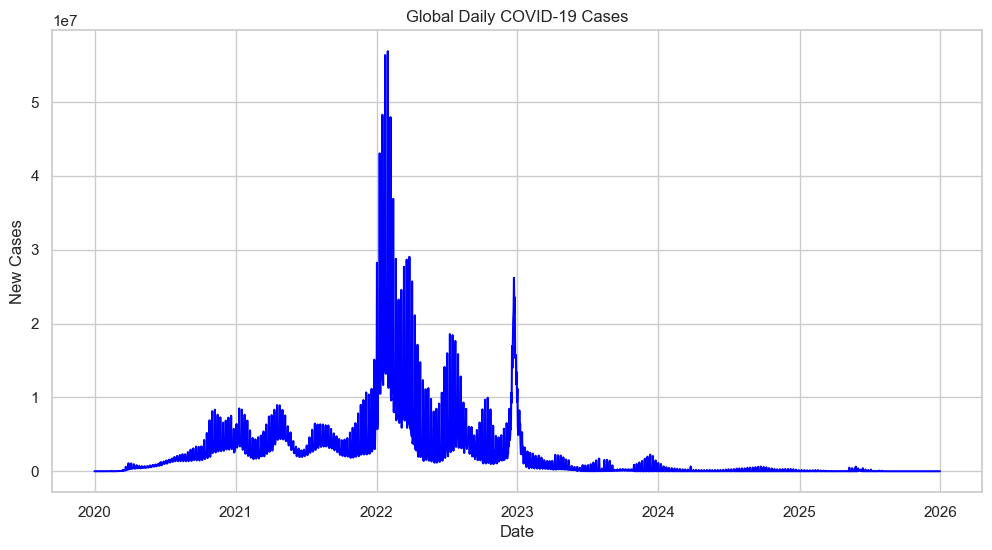

In [11]:
global_cases = df_clean.groupby("date")["new_cases"].sum(min_count=1).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=global_cases, x="date", y="new_cases", color="blue")
plt.title("Global Daily COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()


## Top 10 Countries by Total Cases (Latest Date)


/var/folders/xl/_prys7x50935jglv5gtnkg7w0000gn/T/ipykernel_13577/2004469041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_cases, x="location", y="total_cases", palette="Reds_r")


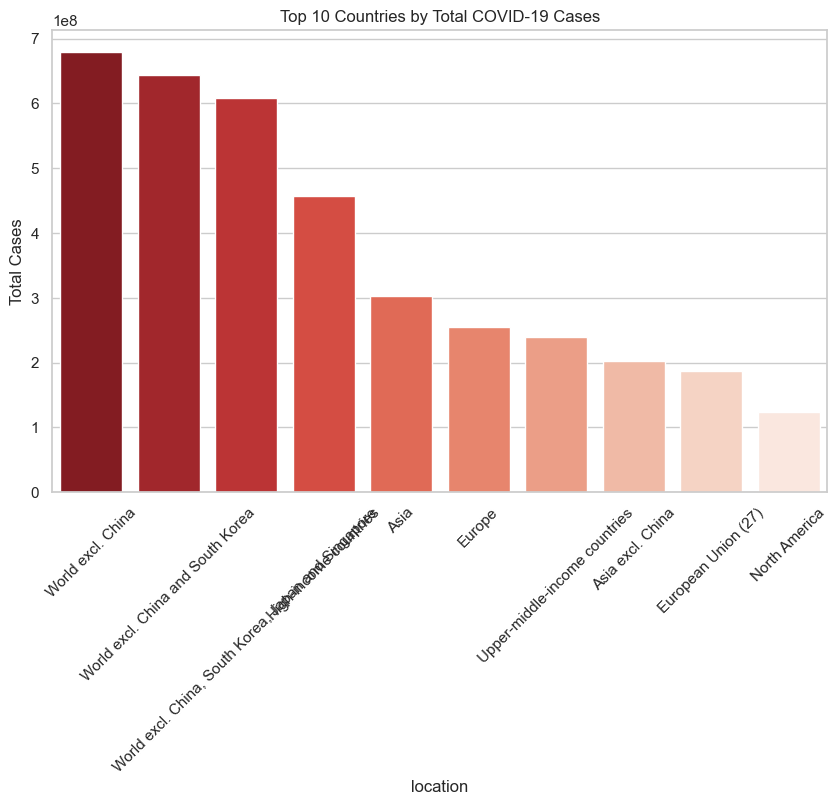

In [12]:
latest_data = df_clean.sort_values("date").groupby("location").tail(1)
top10_cases = latest_data.nlargest(10, "total_cases")[["location", "total_cases"]]

plt.figure(figsize=(10,6))
sns.barplot(data=top10_cases, x="location", y="total_cases", palette="Reds_r")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.show()


## Top 10 Countries by Total Deaths (Latest Date)


/var/folders/xl/_prys7x50935jglv5gtnkg7w0000gn/T/ipykernel_13577/3645036767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_deaths, x="location", y="total_deaths", palette="Greys_r")


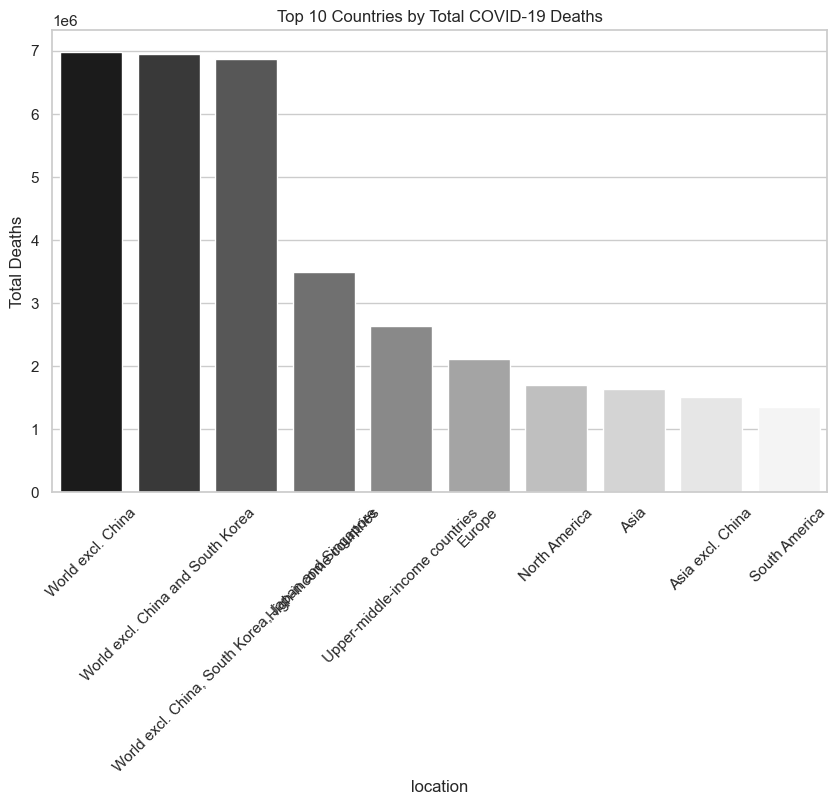

In [13]:
top10_deaths = latest_data.nlargest(10, "total_deaths")[["location", "total_deaths"]]

plt.figure(figsize=(10,6))
sns.barplot(data=top10_deaths, x="location", y="total_deaths", palette="Greys_r")
plt.title("Top 10 Countries by Total COVID-19 Deaths")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.show()


## Vaccination Trend in USA


/var/folders/xl/_prys7x50935jglv5gtnkg7w0000gn/T/ipykernel_13577/518199952.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  usa[["people_vaccinated","people_fully_vaccinated"]].fillna(method="ffill").fillna(0)


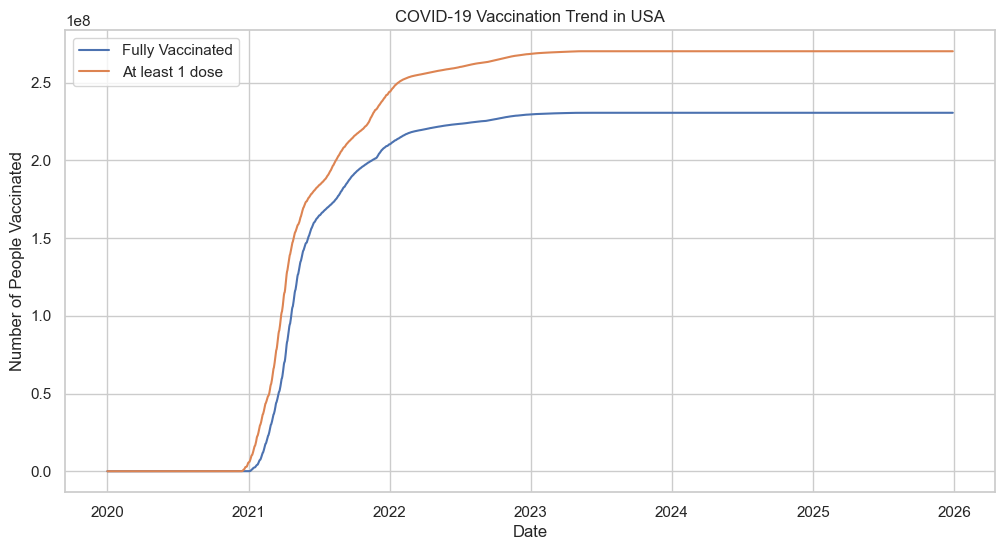

In [14]:
usa = df_clean[df_clean["location"] == "United States"].sort_values("date")
usa[["people_vaccinated","people_fully_vaccinated"]] = \
    usa[["people_vaccinated","people_fully_vaccinated"]].fillna(method="ffill").fillna(0)

plt.figure(figsize=(12,6))
sns.lineplot(data=usa, x="date", y="people_fully_vaccinated", label="Fully Vaccinated")
sns.lineplot(data=usa, x="date", y="people_vaccinated", label="At least 1 dose")
plt.title("COVID-19 Vaccination Trend in USA")
plt.xlabel("Date")
plt.ylabel("Number of People Vaccinated")
plt.legend()
plt.show()


## Vaccination Trend in Europe


/var/folders/xl/_prys7x50935jglv5gtnkg7w0000gn/T/ipykernel_13577/2736028123.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  europe_daily[["people_vaccinated","people_fully_vaccinated"]].fillna(method="ffill").fillna(0)


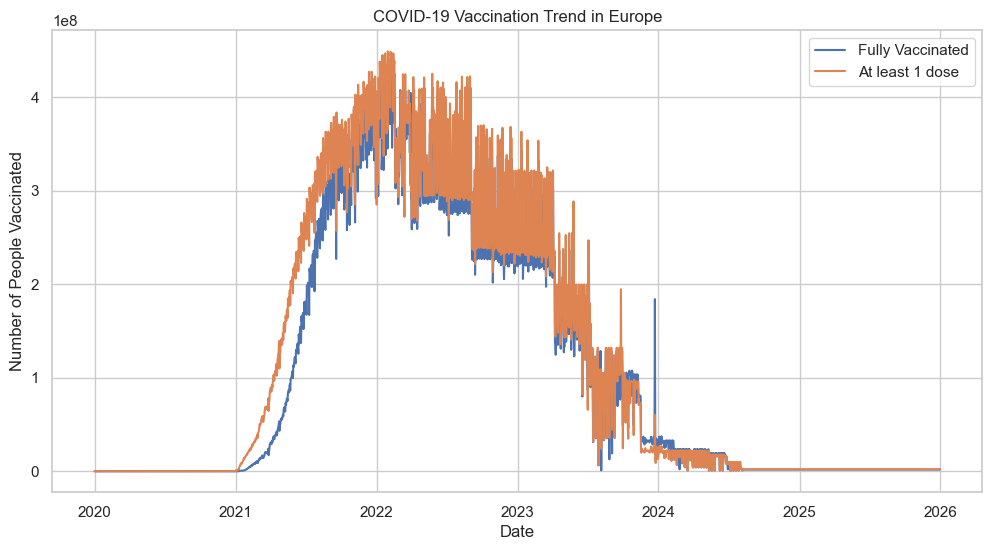

In [15]:
europe = df_clean[df_clean["continent"] == "Europe"].sort_values("date")
europe_daily = europe.groupby("date")[["people_vaccinated","people_fully_vaccinated"]].sum(min_count=1).reset_index()
europe_daily[["people_vaccinated","people_fully_vaccinated"]] = \
    europe_daily[["people_vaccinated","people_fully_vaccinated"]].fillna(method="ffill").fillna(0)

plt.figure(figsize=(12,6))
sns.lineplot(data=europe_daily, x="date", y="people_fully_vaccinated", label="Fully Vaccinated")
sns.lineplot(data=europe_daily, x="date", y="people_vaccinated", label="At least 1 dose")
plt.title("COVID-19 Vaccination Trend in Europe")
plt.xlabel("Date")
plt.ylabel("Number of People Vaccinated")
plt.legend()
plt.show()


# Insights

- The global daily cases peaked in early 2021 and had multiple waves afterward.  
- USA and Europe vaccination trends show rapid increase in early 2021 and slower growth afterward.  
- Top countries by cases and deaths highlight regions most impacted by COVID-19.  
- This notebook can be used for further analysis on COVID-19 trends, vaccination effects, and modeling.
